<a href="https://www.kaggle.com/code/dacxj0/01-simple-linear-regression?scriptVersionId=198145735" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Simple Linear Regression 📈

In this notebook I'm going to try to implement from scratch the most known and maybe used machine learning model: Univariate Linear regression or simple linear regression.

## Notation

**X**: Input data from the source (example: Square feet of a house, number of rooms, number of bathrooms, etc.)

**y**: Output or the expected values (example: Total price of a house)

**w**: Weight or coefficient: Parameter that we can update, it controls the slope of the line that we want to fit in the data

**b**: bias or intercept: Indicates the y-axis position of the line

**$\hat{y}$**: Predicted value using the model

The equation for a linear regression is the following:

$$
 \hat{y} = w*X+b
$$

In [2]:
# Load the data
data = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20240522154015/Salary_Data[1].csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [20]:
# For educational purposes let's drop null values
data.dropna(inplace=True)

In [22]:
# Data has many variables, lets predict Salary by using Years of experience only 
X = data["Years of Experience"]
y = data["Salary"]

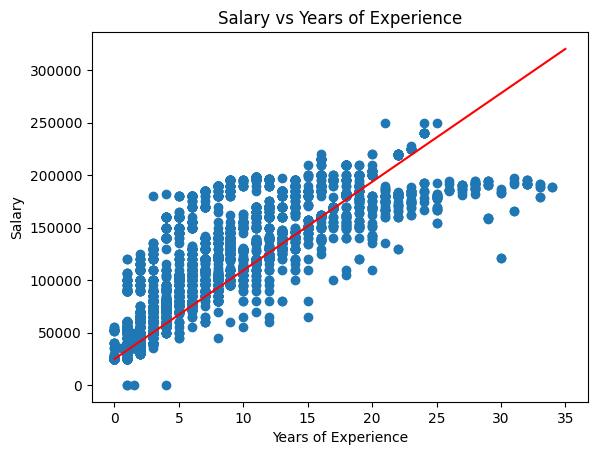

In [23]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set_title("Salary vs Years of Experience")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Salary")
plt.plot([0,35], [25000, 320000], label='Line', color='red') 
plt.show()

What values for w or b can create this line? Feel free to modify the following cell and test different values

In [49]:
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact

# Initial values for w and b
w = 7175.1197
b = 56668.6586

# Function to create the plot
def create_plot(w, b):
    # Scatter plot for data points
    scatter = go.Scatter(x=X, y=y, mode='markers', name='Data', marker=dict(color='red'))
    
    # Line plot for the prediction line
    line = go.Scatter(x=X, y=w * X + b, mode='lines', name='Prediction Line', marker=dict(color='blue'))
    
    # Layout for the plot
    layout = go.Layout(
        title="Salary vs Years of Experience",
        xaxis=dict(title="Years of Experience", range=[0, 40]),
        yaxis=dict(title="Salary"),
        showlegend=True
    )
    
    # Combine data and layout into a figure
    fig = go.Figure(data=[scatter, line], layout=layout)
    
    # Display the figure
    fig.show()

# Update function with interactive widgets
def update(w, b):
    create_plot(w, b)

# Create interactive sliders
interact(update, w=(100, 10000, 50), b=(100, 60000, 50))

interactive(children=(IntSlider(value=5050, description='w', max=10000, min=100, step=50), IntSlider(value=300…

<function __main__.update(w, b)>

La meta es encontrar los valores de $w$ y $b$ de una forma sistemática y que nos garantize cierto nivel de confianza para las predicciones. Para eso tenemos que introducir una métrica para medir que tan bien se comporta el modelo contra los datos reales.

In [40]:
w = 8500
b = 25600

X = X.to_numpy()
y = y.to_numpy()

#
def compute_loss(x, y, w, b):
    m = x.shape[0] 
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  
    return total_cost

loss = compute_loss(X, y, w, b)

print(loss)


739045498.8894447


In [41]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [42]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    loss_history = []
    p_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw 
        if i<100000:     
            loss_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Epoch {i:4}: Cost {loss_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, loss_history, p_history   
        

In [43]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_loss, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Epoch    0: Cost 6.68e+09  dj_dw: -1.192e+06, dj_db: -1.153e+05   w:  1.192e+03, b: 1.15329e+02
Epoch 1000: Cost 7.71e+08  dj_dw:  1.138e+03, dj_db: -1.433e+04   w:  1.023e+04, b: 1.81558e+04
Epoch 2000: Cost 6.23e+08  dj_dw:  7.965e+02, dj_db: -1.003e+04   w:  9.278e+03, b: 3.02020e+04
Epoch 3000: Cost 5.51e+08  dj_dw:  5.574e+02, dj_db: -7.016e+03   w:  8.608e+03, b: 3.86320e+04
Epoch 4000: Cost 5.15e+08  dj_dw:  3.901e+02, dj_db: -4.910e+03   w:  8.139e+03, b: 4.45315e+04
Epoch 5000: Cost 4.98e+08  dj_dw:  2.730e+02, dj_db: -3.436e+03   w:  7.811e+03, b: 4.86600e+04
Epoch 6000: Cost 4.90e+08  dj_dw:  1.910e+02, dj_db: -2.405e+03   w:  7.582e+03, b: 5.15492e+04
Epoch 7000: Cost 4.85e+08  dj_dw:  1.337e+02, dj_db: -1.683e+03   w:  7.421e+03, b: 5.35711e+04
Epoch 8000: Cost 4.83e+08  dj_dw:  9.356e+01, dj_db: -1.178e+03   w:  7.309e+03, b: 5.49861e+04
Epoch 9000: Cost 4.82e+08  dj_dw:  6.547e+01, dj_db: -8.241e+02   w:  7.230e+03, b: 5.59763e+04
(w,b) found by gradient descent: (7175.1

In [45]:
y_pred = []
for i in range(len(X)):
    y_pred.append(w_final * X[i] + b_final )  

In [47]:
# Predict Salary for 12 years
print(12*w_final+b_final)

142770.0947509747
